In [1]:
! pip install transformers



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id"

In [5]:
# Image inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = Image.open(image_path)

    # Preprocessing the Image
    img = image_processor(image, return_tensors="pt").to(device)

    # Generating captions
    output = model.generate(**img)

    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

    return caption

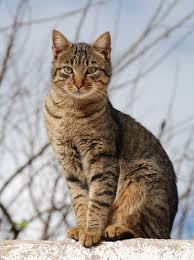

a cat sitting on top of a rock 
0.8373034000396729


In [7]:
#  Image media display
from IPython.display import display

image_path = r"images\cat1.jpg"
img = Image.open(image_path)

display(img)

# Display Caption
import time

start = time.time()
caption = get_caption(model, image_processor, tokenizer, image_path)
print(caption)
print(time.time() - start)